Here I seek to reproduce numerical results from "Radiation hydrodynamic theory of double ablation fronts in direct-drive inertial confinement fusion" from J. Sanz; R. Betti; V. A. Smalyuk; ... et. al.
Using a numerial Differential equation solver. I use the 4th order runge kutta method to solve and arbritrary differential equation whose structure is defined in f(u, vars)


In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# runge kutta 4th order 
def rk4(f, state0, t0, tend, N, vars):
  N = int(N)
  t = np.linspace(t0, tend, N+1) #t grid
  s = np.array((N+1)*[state0]) 
  dt = (tend-t0)/float(N) #stepsize
  for i in range(N):   # fourth order Runge Kutta Metdtod
    k0 = dt * f(s[i], vars)  # s[i] is our state at time t containing 3 values
    k1 = dt * f(s[i] + 0.5 * k0, vars)
    k2 = dt * f(s[i] + 0.5 * k1, vars)
    k3 = dt * f(s[i] + k2, vars)
    s[i+1] = s[i] + (k0 + 2*(k1 + k2) + k3) / 6.
  return t, s

# differential equations 10,11,12 from the rad hydro paper
def f(u, vars0):
  Lsp, Bo, thetat, lp, lr = vars0
  q1, q2 = 2.75, 11./2 #from second math paper Sio2 simulation
  if u[0] < thetat:
    deltat = u[0]**(-q1)
  else:
    deltat = thetat**(q2-q1)*u[0]**(-q2)

  dTheta = (u[0]+u[1]-1)/(Lsp*u[0]**(5/2))
  dPhi = (deltat/(lp*Bo))*(u[0]**4-u[2]**4)  
  dThetaR = -3*deltat*u[1]*Bo/(4*u[2]**3*lr)
  return np.array([dTheta, dPhi, dThetaR])

"""in the Radiation hydrodynamic theory of double ablation fronts in
direct-drive inertial confinement fusion paper. The isobaric Rosseland and Planck mean opacities Kp (microns)  vs electron temperature T (ev) for
CH shows Kp(T) = A*T(-3.5) for T < Tt and Kp(T) = A*T(-6.8) for T > Tt. where Tt is 100ev
thetaT = Tt/Ta
"""

""""From the 'Prominent radiative contributions from multiplyexcited states in laser-produced tin plasma for
nanolithography' Paper: the planck mean opacity in the case of Sn plasma can be calculated as follow ap = 3.3e-7*rho(g/cm^3)/T(ev) """

"""
Opacity has units m^2/kg,
mean free path has units m
1/mean free path is not the opacity !!

"""

"""
From figure 19 from math paper 2 
approximately photon mean free path = lp(microns) = Exp(-13.55+3.5*T(ev)), rossland mean free path = lr = Exp(-12.8+3.5*T(ev))


"""

def change_var(P_a, T_a, K_a, v_a):
  # al from second math paper
  # Amp is the average ion mass, Z is the average ionization per atom

  Lsp = (2./5)*K_a*T_a/(P_a*v_a)
  Bo = 6e-10*P_a*v_a/(T_a)**4

  # derived from figure 19 from math paper 2
  lp = 6.06e-12*T_a**(11/4) # T_a(ev), lp(m)
  lr = 13e-12*T_a**(11/4)# T_a(ev), lr(m)
  
  thetat = 100/T_a # from second math paper
  return [Lsp, Bo, thetat, lp, lr]


Lsp = 3.6e-07, Bo = 3.3870175616860574, thetaT = 3.7037037037037037


/tmp/ipykernel_6399/1474900599.py:20: RuntimeWarning: invalid value encountered in double_scalars
  deltat = u[0]**(-q1)
/tmp/ipykernel_6399/1474900599.py:24: RuntimeWarning: invalid value encountered in double_scalars
  dTheta = (u[0]+u[1]-1)/(Lsp*u[0]**(5/2))


8e-08
100001


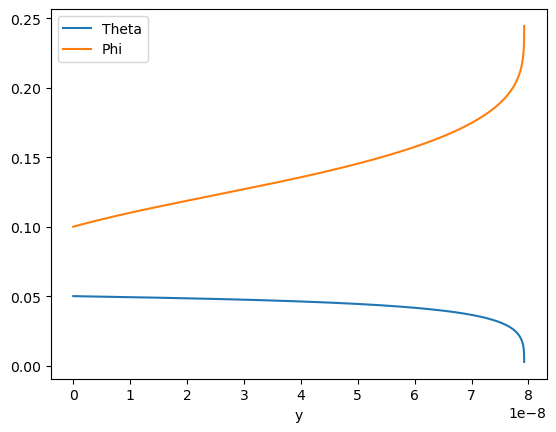

In [30]:
# from Sio2 simulation
Rho_a = 2400 #kg/m^3
T_a = 27 #ev
Tr_a = 72 # ev
P_a = 1e12 #pascal
v_a = 3e3 #m/s


#guess
K_a = 1e8

Lsp, Bo, thetat, lp, lr = change_var(P_a, T_a, K_a, v_a)
print(f'Lsp = {Lsp}, Bo = {Bo}, thetaT = {thetat}')

vars =  Lsp, Bo, thetat, lp, lr
# corresponsing too
# temprature, radiative temprature , Sr/(Pa*va)
Theta0, Thetar0, phi0,  = 1.,1.,-.5 #TBD
N = 1e5
yend = 8.e-8

state0 =  np.array([Theta0, phi0, Thetar0])

t, s = rk4(f, state0, 0, yend, N, vars)
print(t[-1])
print(len(s[:,0]))


plt.plot(t, s[:,0]/20)
#plt.plot(t, s[:,1])
plt.plot(t, s[:,2]/10)
plt.legend(['Theta', 'Phi', 'ThetaR'])
plt.xlabel('y')

plt.show()